In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [73]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [74]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
tesla = yf.Ticker("TSLA")

In [76]:
tesla_data = tesla.history(period="max")

In [77]:
tesla_data.reset_index(inplace=True)

In [98]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [99]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [100]:
html_data = requests.get(url).text

In [101]:
soup = BeautifulSoup(html_data, 'html.parser')

In [102]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [103]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)

In [104]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [105]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [106]:
tesla_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [107]:
tesla_2 = yf.Ticker("GME")

In [108]:
gme_data = tesla_2.history(period="max")

In [110]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [111]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).text

In [112]:
soup_2 = BeautifulSoup(html_data, 'html.parser')

In [113]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [114]:
for row in soup_2.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
    gme_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)

In [115]:
gme_revenue.tail(5)

,Date,Revenue
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112
13,2009,$112


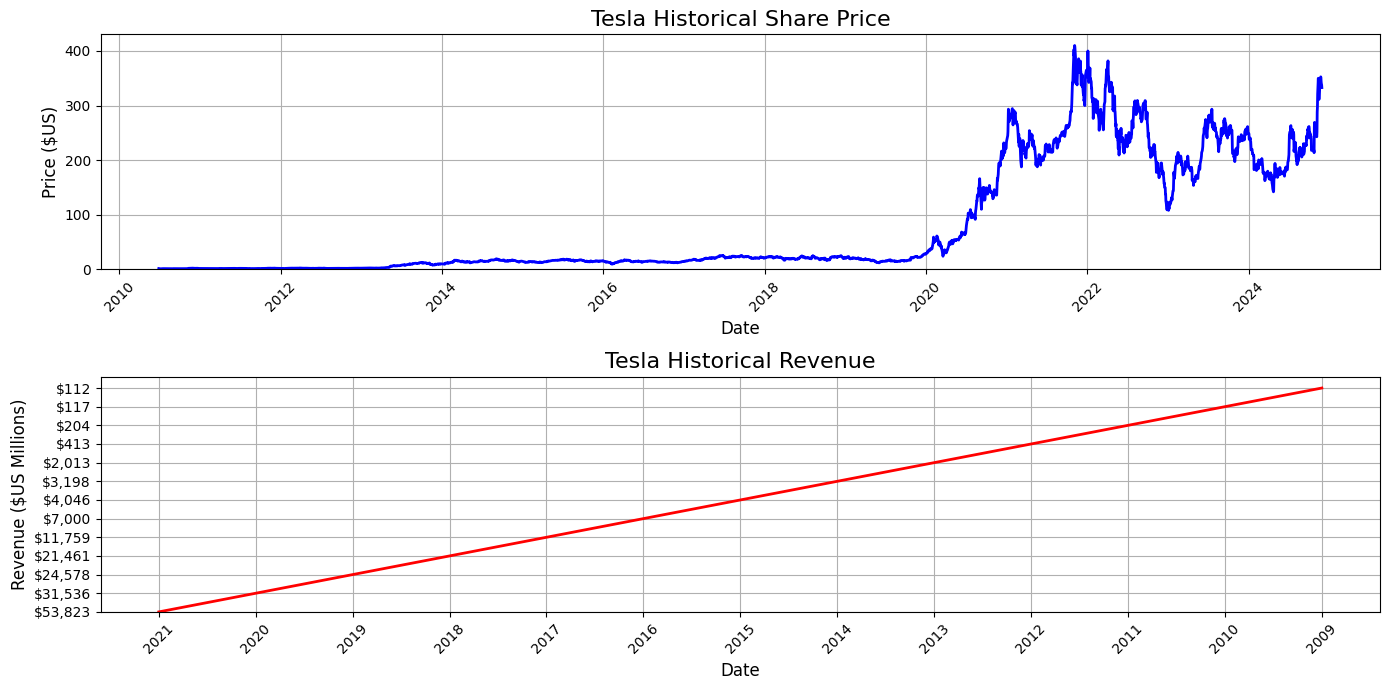

In [116]:
def make_graph(tesla_data, tesla_revenue, title):
    plt.figure(figsize=(14, 7))

    # Plot stock prices
    plt.subplot(2, 1, 1)
    plt.plot(tesla_data['Date'], tesla_data['Close'], color='blue', linewidth=2)
    plt.title(f"{title} Historical Share Price", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price ($US)", fontsize=12)
    plt.grid(visible=True)
    plt.xticks(rotation=45)

    # Customize y-axis limits and ticks
    plt.ylim(bottom=0)  # Start y-axis at 0
    plt.yticks(fontsize=10)

    # Plot revenue
    plt.subplot(2, 1, 2)
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='red', linewidth=2)
    plt.title(f"{title} Historical Revenue", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Revenue ($US Millions)", fontsize=12)
    plt.grid(visible=True)
    plt.xticks(rotation=45)

    # Customize y-axis limits and ticks
    plt.ylim(bottom=0)  # Start y-axis at 0
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

# Call the make_graph function to display the graphs
make_graph(tesla_data, tesla_revenue, 'Tesla')

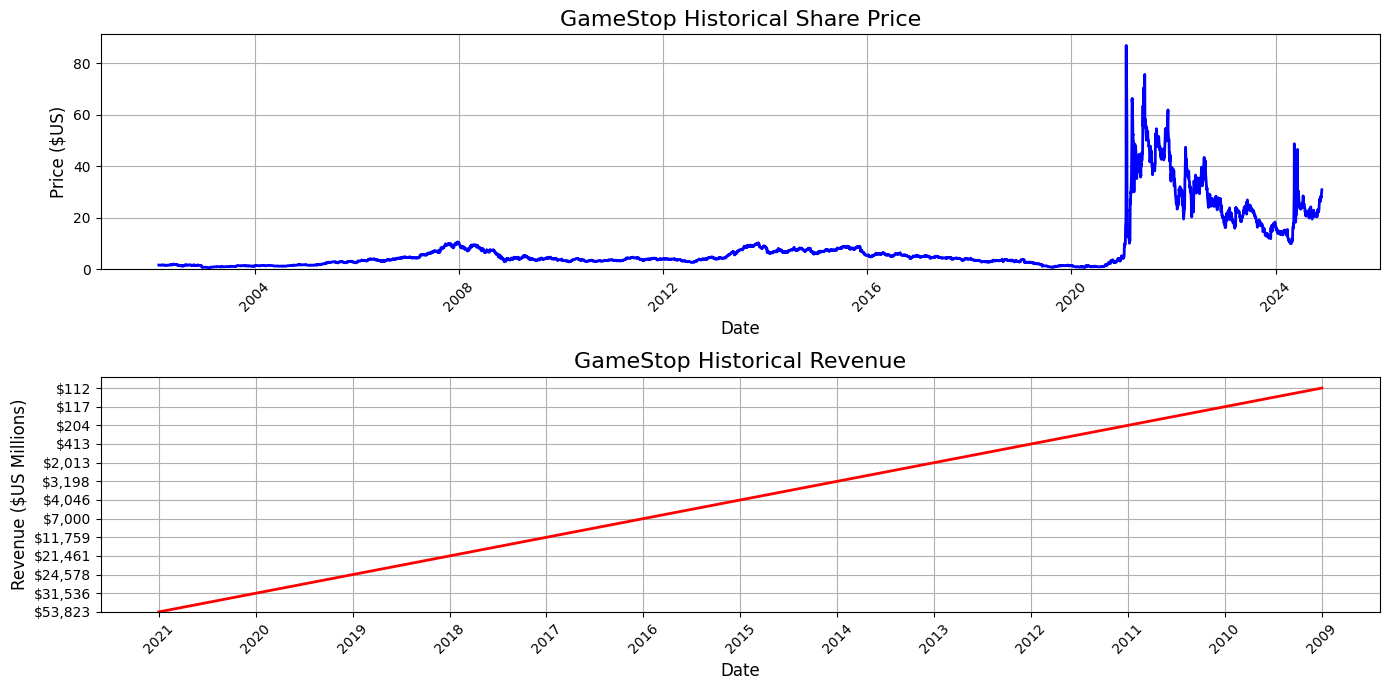

In [97]:
make_graph(gme_data, gme_revenue, 'GameStop')